# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Задачи исследования
- Изучить параметры квартир из объявлений (площадь, цена, число комнат, высота потолков)
- Изучить время продажи квартир.
- Изучить зависимость Цены квартиры от параметров квартиры (число комнат, удалённость от центра, этаж, дата размещения объявления)
- Определить 10 населённых пунктов с наибольшим числом объявлений, расчитать среднюю цену квадратного метра. Выделите населённые пункты с самой высокой и низкой стоимостью жилья.
- На основе динамики изменения цены от удаленности от центра определить центральную зону для Санкт-Петербурга.
- Выделить сегмент квартир в центре. Изучить факторы влияющие на стоимость квартир в центре.

## Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах(м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
# настраиваем окружение
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from math import ceil
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
#flats = pd.read_csv('C:\\Y.Practikum\\project_2\\dataset\\real_estate_data.csv', sep='\t')

flats = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

flats.info()
flats.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


### Вывод

Набор содержит 23699 записей, есть пропуски в данных.  
Поля таблицы, для которых требуется заменить тип данных:

|Поле|Текущий тип|Новый тип|Комментарий|
|----|-----------|---------|-----------|
|last_price|float64|int64|Цена в рублях без копеек|
|first_day_exposition|object|datetime|Дата публикации|
|floors_total|float64|int64|Это всегда целое число|
|is_apartment|object|bool|Булево значение|
|balcony|float64|int64|Это всегда целое число|
|airports_nearest|float64|int64|Расстояние в метрах, целое значение|
|cityCenters_nearest|float64|int64|Расстояние в метрах, целое значение|
|parks_around3000|float64|int64|Это всегда целое число|
|parks_nearest|float64|int64|Расстояние в метрах, целое значение|
|ponds_around3000|float64|int64|Это всегда целое число|
|ponds_nearest|float64|int64|Расстояние в метрах, целое значение|
|days_exposition|float64|int64|Целое число дней|

__Параметры объявлений заполняемые пользователем, в которых есть пропуски:__
- ceiling_height  
- floors_total
- living_area
- is_apartment
- kitchen_area
- balcony
- locality_name

Пропуски в этих параметрах, скорее всего, вызваны тем, что пользователь или не знал какое значение указать (для высоты потолка, например) или этого параметра у квартиры нет (в случае Кол-ва балконов) или просто забыл указать (например: Кол-во этажей в доме).  
Для дальнейшего изучения нам интересны параметры: ceiling_height, floors_total, living_area, kitchen_area, locality_name. Значение параметра ceiling_height, можно заполнить средним по аналогичным квартирам, т.к. застройка в городах обычно типовая.  
Пропуски в living_area, kitchen_area можно попробовать расчитать на основе total_area.
  
__Параметры с пропусками заполняемые автоматически:__
- airports_nearest
- cityCenters_nearest
- parks_around3000
- parks_nearest
- ponds_around3000
- ponds_nearest
- days_exposition

Значения не были посчитаны автоматически из-за того, что параметр для квартиры не используется. Рядом с домом нет водоема или парка - нельзя посчитать расстояние. Или населенный пункт слишком маленький - в нем нельзя выделить центр и посчитать от него расстояние.

### Шаг 2. Предобработка данных

In [3]:
# Для каждого столбца в dataset проверим корректность данных, наличие пропусков, изменим тип данных (где необходимо)
# total_images            23699 non-null int64
print('total_images:',
      '\n',
    flats['total_images'].describe()
    )

# Пропусков нет, значения выглядят корректно

total_images: 
 count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64


In [4]:
# last_price              23699 non-null float64
# Т.к. пропусков в данных нет и цена квартиры в рублях, то можно округлить значения до целых чисел и привести тип к int64
flats['last_price'] = flats['last_price'].astype('int64')

# Цена дана в рублях, переведем значение в тысячи рублей, чтобы на графиках было удобнее отображать
flats['last_price'] = flats['last_price'] / 1000

print('last_price:',
      '\n',
    flats['last_price'].describe()
    )
# Данные выглядят корректно, пропусков нет. Подозрительной кажется минимальная цена квартиры - 12 190 руб. 
# И максимальная цена 763 млн. руб (верю, что такие квартиры есть, но явно это не типовой вариант) искажает среднее значение

last_price: 
 count     23699.000000
mean       6541.548772
std       10887.013268
min          12.190000
25%        3400.000000
50%        4650.000000
75%        6800.000000
max      763000.000000
Name: last_price, dtype: float64


In [5]:
# total_area              23699 non-null float64
print('total_area:',
      '\n',
    flats['total_area'].describe()
    )
# Пропусков нет, значения выглядят корректно

total_area: 
 count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64


In [6]:
# rooms                   23699 non-null int64
flats['rooms'].value_counts()
# Пропусков в данных нет. Но минимальное кол-во комнат = 0 (197 квартир), максимальное 19 (1 квартира)
print('Кол-во квартир, для которых не указано кол-во комнат: 197')

# проверим квартиры "без комнат", возможно, это студии
print('Кол-во студий, для которых не указано кол-во комнат:',
    flats.query('rooms == 0 and studio == True')['studio'].count(),
      '\n'
     )
# Для студий оставим кол-во комнат = 0, т.к. в студии нет отдельной комнаты, только общее пространство комната + кухня

# проверим метраж оставшихся квартир
print('Метраж квартир(не студий):',
      '\n',
    flats.query('rooms == 0 and studio != True')['total_area'].describe(),
      '\n'
)
# всего 59 квартир и 75% из них, скорее всего, однокомнатные - 28 м.кв.
# укажем кол-во комнат = 1 для квартир(не студий) с малой площадью

flats[(flats['rooms'] == 0) & (flats['studio'] == False) & (flats['total_area'] <= 28.25)] = 1

# Остальные квартиры, у которых rooms = 0 и это не студии, удалим из набора. Скорее всего это некорректные объявления
flats = flats.query('rooms > 0 or studio == True')

Кол-во квартир, для которых не указано кол-во комнат: 197
Кол-во студий, для которых не указано кол-во комнат: 138 

Метраж квартир(не студий): 
 count     59.000000
mean      32.707288
std       44.986261
min       16.000000
25%       25.000000
50%       26.100000
75%       28.250000
max      371.000000
Name: total_area, dtype: float64 



In [7]:
# ceiling_height          14504 non-null float64
print('Стобец ceiling_height. Данные до преобразований:\n',
      '\n',
    'ceiling_height:',
      '\n',
    flats['ceiling_height'].describe(),
      '\n'
    )
# Есть пропуски и некорректные значения
# Яндекс.Поиск говорит, что мин. высота потолка 2,5 м. В массовой застройке высота потолка от 2,5 м. до 3,2 м. 
# В старых и элитных домах потолки бывают до 4-5 м.

# Значения ceiling_height < 2.5 некорректные, заменим их на 2.5 (минимально допустимая высота потолков)
flats.loc[flats['ceiling_height'] < 2.5] = 2.5

Стобец ceiling_height. Данные до преобразований:
 
 ceiling_height: 
 count    14538.000000
mean         2.764424
std          1.247223
min          1.000000
25%          2.510000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64 



In [8]:
# В столбце ceiling_height много пропусков, но их можно заполнить на основе средних значений, т.к. застройка типовая.
# Наибольшее кол-во объявлений в СПБ, отдельно посмотрим выборки по квартирам в СПБ и остальным городам

print('Квартиры в Санкт-Петербурге:',
      '\n',
      flats.query('locality_name == "Санкт-Петербург"')['ceiling_height']
      .describe(),
      '\n'
     )

print('Остальные квартиры области:',
      '\n', 
      flats.query('locality_name != "Санкт-Петербург"')['ceiling_height']
      .describe()
     )

# Пропуски в ceiling_height заполним значением 50-й перцентили
# для СПБ значение (2.7 м) совпадает с наиболее часто используемым в массовой застройке

flats.loc[(flats['locality_name'] == "Санкт-Петербург") & (flats['ceiling_height'].isna()), 'ceiling_height'] = 2.7

flats.loc[(flats['locality_name'] != "Санкт-Петербург") & (flats['ceiling_height'].isna()), 'ceiling_height'] = 2.6

Квартиры в Санкт-Петербурге: 
 count    10066.000000
mean         2.805141
std          1.298968
min          2.500000
25%          2.550000
50%          2.700000
75%          2.880000
max        100.000000
Name: ceiling_height, dtype: float64 

Остальные квартиры области: 
 count    4472.000000
mean        2.690653
std         1.103078
min         2.500000
25%         2.500000
50%         2.600000
75%         2.700000
max        32.000000
Name: ceiling_height, dtype: float64


In [9]:
#flats['locality_name'] = flats['locality_name'].fillna('Нет данных')
print('После преобразований:\n',
      '\n',
    'ceiling_height:',
      '\n',
    flats['ceiling_height'].describe(),
      '\n'
    )

После преобразований:
 
 ceiling_height: 
 count    23684.000000
mean         2.727924
std          0.975825
min          2.500000
25%          2.600000
50%          2.700000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64 



Пропуски в столбце ceiling_height были заполнены значением 50-й перцентили, которую посчитали отдельно для квартир в СПБ и остальных городов.
Значения ceiling_height меньше 2.5 м. заменил на 2.5, т.к. это минимально допустимая высота потолков.
Медиану не использовал, т.к. в данных есть выбросы (сверхбольшие значения), которые влияют на медиану и среднее значение.

In [10]:
# floors_total            23613 non-null float64
print('floors_total:',
      '\n',
    flats['floors_total'].describe(),
      '\n'
    )
# Есть пропуски в данных, значения выглядят корректно
# Из-за того, что есть пропуски в данных изменение типа на int64 невозможно

# floor                   23699 non-null int64
print('floor:',
      '\n',
    flats['floor'].describe()
    )
# данные корректные

floors_total: 
 count    23598.000000
mean        10.625795
std          6.597924
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64 

floor: 
 count    23684.000000
mean         5.871200
std          4.874004
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64


In [11]:
# living_area             21796 non-null float64
print('living_area:',
      '\n',
    flats['living_area'].describe(),
      '\n'
    )
# Есть пропуски, есть некорректные значения

# kitchen_area            21421 non-null float64
print('kitchen_area:',
      '\n',
    flats['kitchen_area'].describe()
    )
# Есть пропуски в данных, есть некорректные (слишком маленькие) значения

# Нужно определить от каких параметров зависят living_area, kitchen_area и заполнить пропуски на основе этих параметров

flats.corr()

living_area: 
 count    21791.000000
mean        34.339799
std         22.131304
min          2.000000
25%         18.500000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64 

kitchen_area: 
 count    21472.000000
mean        10.534169
std          5.923618
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
total_images,1.000000,0.107681,0.124133,0.094999,0.006849,0.018970,0.113267,0.036180,0.113107,0.105886,0.017645,-0.033280,0.002210,0.018583,-0.026539,0.026914,-0.021378
last_price,0.107681,1.000000,0.652996,0.362707,0.069260,-0.002791,0.567263,0.028980,0.521511,0.023368,-0.017009,-0.198163,0.139294,-0.004637,0.151167,-0.070593,0.083310
total_area,0.124133,0.652996,1.000000,0.751986,0.086251,-0.063427,0.940219,-0.017713,0.613632,0.028635,-0.008098,-0.211410,0.137830,0.008798,0.141863,-0.061227,0.155156
rooms,0.094999,0.362707,0.751986,1.000000,0.051997,-0.226450,0.838924,-0.149541,0.265668,0.026661,-0.066227,-0.186904,0.139484,-0.056602,0.096447,-0.062290,0.122721
ceiling_height,0.006849,0.069260,0.086251,0.051997,1.000000,-0.025120,0.083673,-0.012689,0.074696,0.038388,-0.016865,-0.081030,0.052507,-0.012617,0.060430,-0.040981,0.020550
floors_total,0.018970,-0.002791,-0.063427,-0.226450,-0.025120,1.000000,-0.157242,0.679063,0.171090,0.174984,0.125920,0.033066,-0.265946,0.119222,-0.137734,0.068131,-0.045364
living_area,0.113267,0.567263,0.940219,0.838924,0.083673,-0.157242,1.000000,-0.090477,0.434918,0.001034,-0.035239,-0.211897,0.157687,-0.019423,0.128916,-0.045430,0.147660
floor,0.036180,0.028980,-0.017713,-0.149541,-0.012689,0.679063,-0.090477,1.000000,0.139445,0.157804,0.081994,0.016418,-0.170515,0.085003,-0.084396,0.041895,-0.035596
kitchen_area,0.113107,0.521511,0.613632,0.265668,0.074696,0.171090,0.434918,0.139445,1.000000,0.079018,0.028910,-0.171863,0.064528,0.055753,0.130437,-0.068724,0.106816
balcony,0.105886,0.023368,0.028635,0.026661,0.038388,0.174984,0.001034,0.157804,0.079018,1.000000,0.031387,0.022875,-0.041483,-0.001136,-0.003041,-0.047178,-0.042638


У параметров living_area, kitchen_area максимальная корреляция с параметром total_area. Можно заполнить пропуски на основе соотношения living_area, kitchen_area с total_area 

In [12]:
# создадим отделный dataset для расчета значений, удалим все пропуски
flats_area = flats.loc[:, ['living_area', 'kitchen_area', 'total_area']].dropna()

# посчитаем отношение жилой площади и площади кухни к общей площади квартиры
flats_area['living_part'] = flats_area['living_area'] / flats_area['total_area']
flats_area['kitchen_part'] = flats_area['kitchen_area'] / flats_area['total_area']

flats_area.describe()

living_part_value = 0.564810
kitchen_part_value = 0.191553

In [13]:
# Медианное значение living_part и kitchen_part используем для расчета и заполнения пропусков
def fill_area_na(row):
    if pd.isna(row['living_area']):
        row['living_area'] = row['total_area'] * living_part_value
    
    if pd.isna(row['kitchen_area']):
        row['kitchen_area'] = row['total_area'] * kitchen_part_value
    
    return row

flats = flats.apply(fill_area_na, axis=1)

print('После преобразований:',
     '\n',
     flats['living_area'].describe(),
     '\n')

print(flats['kitchen_area'].describe())

После преобразований: 
 count    23684.000000
mean        34.451584
std         22.393407
min          2.000000
25%         19.000000
50%         30.000000
75%         42.083759
max        409.700000
Name: living_area, dtype: float64 

count    23684.000000
mean        10.574528
std          6.122101
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64


Для заполнения пропусков в столбцах living_area, kitchen_area были расчитаны медианы для значений living_area/total_area и kitchen_area/total_area. B т.к. total_area заполнен для всех квартир, то пропуски в living_area, kitchen_area были расчитаны.
В результате для столбцов living_area, kitchen_area медианное значение поменялось незначительно, т.е. ошибки в набор данных мы не внесли.

In [14]:
# is_apartment            2775 non-null object
print('До преобразования:',
      '\n',
      flats['is_apartment'].value_counts(),
      '\n'
     )

# В данных много пропусков. Предполагаю, что там где значение пропущено, это обычная квартира (не аппартаменты). 
# На рынке квартир намного больше чем студий и аппартаментов. 
# Пропущенные значения меняем на 0 и поменяем тип данных на bool

flats['is_apartment'].fillna(0, inplace=True)
flats['is_apartment'] = flats['is_apartment'].astype('bool')
print('После преобразования:',
      '\n',
    flats['is_apartment'].value_counts()
     )

До преобразования: 
 False    2712
2.5       117
True       50
Name: is_apartment, dtype: int64 

После преобразования: 
 False    23517
True       167
Name: is_apartment, dtype: int64


In [15]:
# studio                  23699 non-null bool
flats['studio'].value_counts()

# пропусков нет, данные корректные

False    23418
True       149
2.5        117
Name: studio, dtype: int64

In [16]:
# open_plan               23699 non-null bool

flats['open_plan'].value_counts()

# пропусков нет, данные корректные

False    23559
2.5        117
True         8
Name: open_plan, dtype: int64

In [17]:
# balcony                 12180 non-null float64
print('balcony:',
      '\n',
    flats['balcony'].describe()
    )

# Пропуски заполним 0, т.к. если кол-во балконов не указано, то, скорее всего, балкона просто нет
flats['balcony'].fillna(0, inplace=True)
# поменяем тип на int64
flats['balcony'] = flats['balcony'].astype('int64')

balcony: 
 count    12208.000000
mean         1.160591
std          1.075179
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          5.000000
Name: balcony, dtype: float64


In [18]:
# locality_name           23650 non-null object

# В данных есть пропуски данных и некорректное значение "1" - заменим на значение "Нет данных"
# Есть дублирование данных из-за разницы написания слов "поселок - посёлок"

# заполняем пропуски
flats['locality_name'] = flats['locality_name'].fillna('Нет данных')

# убираю разницу в написании слов "поселок - посёлок"
flats['locality_name'] = flats['locality_name'].str.replace('посёлок', 'поселок')

# Убираем вариации "городской поселок", "поселок городского типа" - приведем их к единому виду
flats['locality_name'] = flats['locality_name'].str.replace('городской поселок', 'поселок городского типа')

In [19]:
# Часть населенных пунктов дублируются - один поселок может быть указан как "деревня" и как "поселок городского типа"
# Например: 'деревня Фёдоровское' и 'городской поселок Фёдоровское'

# названия населенных пунктов нужно разбить на отдельные слова, составить из них список 
# и посчитать кол-во вхождений уникальных слова 
locality_unique_names = (
    ' '.join(
            map(str,
            list(
                    flats['locality_name'].unique()
                )
            )
        ).
    split(' ')
    )

print(Counter(locality_unique_names))

Counter({'поселок': 158, 'деревня': 106, 'городского': 35, 'типа': 35, 'село': 9, 'станции': 7, 'Бор': 6, 'товарищество': 5, 'садовое': 4, 'Старая': 4, 'Большая': 3, 'коттеджный': 3, 'Мурино': 2, 'Кудрово': 2, 'Фёдоровское': 2, 'Новая': 2, 'Ропша': 2, 'Никольское': 2, 'Новый': 2, 'Романовка': 2, 'Павлово': 2, 'Рахья': 2, 'Колпаны': 2, 'Ладога': 2, 'Зимитицы': 2, 'имени': 2, 'Рябово': 2, 'Бегуницы': 2, 'Малое': 2, 'Вещево': 2, 'Калитино': 2, 'Приладожский': 2, 'Щеглово': 2, 'Рабитицы': 2, 'Гарболово': 2, 'Приветнинское': 2, 'Любань': 2, 'Красная': 2, 'Горка': 2, 'при': 2, 'железнодорожной': 2, 'Громово': 2, 'Лесное': 2, 'Санкт-Петербург': 1, 'Шушары': 1, 'Янино-1': 1, 'Парголово': 1, 'Ломоносов': 1, 'Сертолово': 1, 'Петергоф': 1, 'Пушкин': 1, 'Коммунар': 1, 'Колпино': 1, 'Красный': 1, 'Гатчина': 1, 'Выборг': 1, 'Кронштадт': 1, 'Кировск': 1, 'Новое': 1, 'Девяткино': 1, 'Металлострой': 1, 'Лебяжье': 1, 'Сиверский': 1, 'Молодцово': 1, 'Кузьмоловский': 1, 'Павловск': 1, 'Пикколово': 1, 'Все

Из словаря выбираем названия населенных пунктов, которые встречаются более 1 раза:   
- 'Мурино': 2, 
- 'Кудрово': 2, 
- 'Фёдоровское': 2, 
- 'Ропша': 2, 
- 'Никольское': 2, 
- 'Романовка': 2, 
- 'Павлово': 2, 
- 'Рахья': 2, 
- 'Колпаны': 2, 
- 'Ладога': 2, 
- 'Зимитицы': 2, 
- 'Рябово': 2, 
- 'Бегуницы': 2, 
- 'Вещево': 2, 
- 'Калитино': 2, 
- 'Приладожский': 2, 
- 'Щеглово': 2, 
- 'Рабитицы': 2, 
- 'Гарболово': 2, 
- 'Приветнинское': 2, 
- 'Любань': 2, 
- 'Горка': 2, 
- 'Громово': 2, 
- 'Лесное': 2

Для этих названий нужно проверить, почему они дублируются

In [20]:
# Заменяем дубликаты
flats['locality_name'] = flats['locality_name'].str.replace('поселок Мурино', 'Мурино')
flats['locality_name'] = flats['locality_name'].str.replace('деревня Кудрово', 'Кудрово')
flats['locality_name'] = flats['locality_name'].str.replace('деревня Фёдоровское', 'поселок городского типа Фёдоровское')
flats['locality_name'] = flats['locality_name'].str.replace('село Никольское', 'Никольское')
flats['locality_name'] = flats['locality_name'].str.replace('село Павлово', 'поселок городского типа Павлово')
flats['locality_name'] = flats['locality_name'].str.replace('садовое товарищество Рахья', 'поселок городского типа Рахья')
flats['locality_name'] = flats['locality_name'].str.replace('деревня Зимитицы', 'поселок Зимитицы')
flats['locality_name'] = flats['locality_name'].str.replace('поселок Рябово', 'поселок городского типа Рябово')
flats['locality_name'] = flats['locality_name'].str.replace('поселок станции Вещево', 'поселок при железнодорожной станции Вещево')
flats['locality_name'] = flats['locality_name'].str.replace('деревня Калитино', 'поселок Калитино')
flats['locality_name'] = flats['locality_name'].str.replace('садовое товарищество Приладожский', 'поселок городского типа Приладожский')
flats['locality_name'] = flats['locality_name'].str.replace('деревня Щеглово', 'поселок Щеглово')
flats['locality_name'] = flats['locality_name'].str.replace('деревня Рабитицы', 'поселок Рабитицы')
flats['locality_name'] = flats['locality_name'].str.replace('деревня Гарболово', 'поселок Гарболово')
flats['locality_name'] = flats['locality_name'].str.replace('поселок станции Приветнинское', 'поселок при железнодорожной станции Приветнинское')
flats['locality_name'] = flats['locality_name'].str.replace('поселок Любань', 'Любань')
flats['locality_name'] = flats['locality_name'].str.replace('поселок станции Громово', 'поселок Громово')
flats['locality_name'] = flats['locality_name'].str.replace('коттеджный поселок Лесное', 'поселок Лесное')

In [21]:
# финальный список населенных пунктов
flats['locality_name'].value_counts()

Санкт-Петербург                                            15660
Мурино                                                       583
Кудрово                                                      459
поселок Шушары                                               440
Всеволожск                                                   397
Пушкин                                                       366
Колпино                                                      337
поселок Парголово                                            323
Гатчина                                                      307
Выборг                                                       235
Петергоф                                                     201
Сестрорецк                                                   183
Красное Село                                                 177
деревня Новое Девяткино                                      144
Сертолово                                                    140
Ломоносов                

In [22]:
# airports_nearest        18157 non-null float64
# Пропуски заменим на 0 и заменим тип на int64
flats['airports_nearest'] = flats['airports_nearest'].fillna(0)
flats['airports_nearest'] = flats['airports_nearest'].astype('int64')

In [23]:
# cityCenters_nearest     18180 non-null float64
print('cityCenters_nearest:',
      '\n',
    flats['cityCenters_nearest'].describe()
    )
# Пустые значения оставляем без изменений, нет данных для расчетов

cityCenters_nearest: 
 count    18224.000000
mean     14097.885234
std       8659.570018
min          2.500000
25%       9072.000000
50%      13056.000000
75%      16270.250000
max      65968.000000
Name: cityCenters_nearest, dtype: float64


In [24]:
# parks_around3000        18181 non-null float64
print('parks_around3000:',
      '\n',
    flats['parks_around3000'].describe()
    )

# Если значение не указано, скорее всего, парка рядом нет
# заполним пропуски нулями, изменим тип данных
flats['parks_around3000'] = flats['parks_around3000'].fillna(0)
flats['parks_around3000'] = flats['parks_around3000'].astype('int64')

parks_around3000: 
 count    18225.000000
mean         0.623347
std          0.813682
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64


In [25]:
# parks_nearest           8079 non-null float64
print('parks_nearest:',
      '\n',
    flats['parks_nearest'].describe()
    )

# Если значение не указано, скорее всего, парка рядом нет
# заполним пропуски нулями, изменим тип данных
flats['parks_nearest'] = flats['parks_nearest'].fillna(0)
flats['parks_nearest'] = flats['parks_nearest'].astype('int64')

parks_nearest: 
 count    8161.000000
mean      483.646918
std       345.263507
min         1.000000
25%       280.000000
50%       447.000000
75%       610.000000
max      3190.000000
Name: parks_nearest, dtype: float64


In [26]:
# ponds_around3000        18181 non-null float64
print('ponds_around3000:',
      '\n',
    flats['ponds_around3000'].describe()
    )

# Если значение не указано, скорее всего, водоема рядом нет
# заполним пропуски нулями, изменим тип данных
flats['ponds_around3000'] = flats['ponds_around3000'].fillna(0)
flats['ponds_around3000'] = flats['ponds_around3000'].astype('int64')

ponds_around3000: 
 count    18225.000000
mean         0.781262
std          0.945835
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64


In [27]:
# ponds_nearest           9110 non-null float64
print('ponds_nearest:',
      '\n',
    flats['ponds_nearest'].describe()
    )

# Если значение не указано, скорее всего, водоема рядом нет
# заполним пропуски нулями, изменим тип данных

flats['ponds_nearest'] = flats['ponds_nearest'].fillna(0)
flats['ponds_nearest'] = flats['ponds_nearest'].astype('int64')

ponds_nearest: 
 count    9184.000000
mean      511.450294
std       281.961174
min         2.500000
25%       284.000000
50%       496.000000
75%       724.000000
max      1344.000000
Name: ponds_nearest, dtype: float64


In [28]:
# days_exposition         20518 non-null float64
print('days_exposition:',
      '\n',
    flats['days_exposition'].describe()
    )
# Значения days_exposition не указаны из-за того, что объявление еще не снято и квартира все еще продается. 
# Во многих случаях владелец, скорее всего, просто забыл снять объявление

# first_day_exposition    23699 non-null object
# Тип нужно привести к datetime, чтобы дальше можно было работать со значением - датой

# некорректные значения заменим на NAT
flats['first_day_exposition'] = pd.to_datetime(flats['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S', errors='coerce')
flats['first_day_exposition'].dtypes

days_exposition: 
 count    20513.000000
mean       180.266733
std        219.868549
min          1.000000
25%         44.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64


dtype('<M8[ns]')

In [29]:
# dataset после преобразования
flats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23684 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23684 non-null float64
last_price              23684 non-null float64
total_area              23684 non-null float64
first_day_exposition    23684 non-null datetime64[ns]
rooms                   23684 non-null float64
ceiling_height          23684 non-null float64
floors_total            23598 non-null float64
living_area             23684 non-null float64
floor                   23684 non-null float64
is_apartment            23684 non-null bool
studio                  23684 non-null object
open_plan               23684 non-null object
kitchen_area            23684 non-null float64
balcony                 23684 non-null int64
locality_name           23567 non-null object
airports_nearest        23684 non-null int64
cityCenters_nearest     18224 non-null float64
parks_around3000        23684 non-null int64
parks_nearest           23684 non-null int64
ponds

### Вывод

- Часть полей содержат пропуски. Предполагаю, это из-за того, что у людей при заполнении объявления не было информации, чтобы заполнить поле (например: рядом с домом нет парка или человек о нем не знает, поле не заполнено), поле оставили пустым. Такие пропуски были заполнены значением "0".
- Есть квартиры, у которых кол-во комнат равно 0. Среди таких записей выделены записи о квартирах, которые не являются студиями и по метражу похожи на однокомнатные. Кол-во комнат для таких квартир установлено в 1
- Пропуски в столбце ceiling_height были заполнены значением 50-й перцентили для значений столбца ceiling_height, которую посчитали отдельно для квартир в СПБ и остальных городов. Значения ceiling_height меньше 2.5 м. заменил на 2.5, т.к. это минимально допустимая высота потолков.
- Для заполнения пропусков в столбцах living_area, kitchen_area были расчитаны медианы для значений living_area/total_area и kitchen_area/total_area. Пропущенные значения living_area, kitchen_area были расчитаны из total_area через полученные коэффициенты
- В floors_total есть пропуски, восстановить данные нельзя
- Колонка locality_name - населенный пункт содержит дубликаты в типах населенных пунктов (например: городской поселок и поселок городского типа) и в способе написания названия (через "ё" или "е"). Типы населенных пунктов приведены к единому виду, дубликаты удалены.
__Рекомендация разработчикам__: значения locality_name явно выбираются из словаря при заполнении объявления. Нужно привести словарь к единому формату типов населенных пунктов и удалить дубликаты.
Например: "посёлок - поселок", "городской поселок - поселок городского типа", "деревня Фёдоровское - городской поселок Фёдоровское"

### Шаг 3. Посчитайте и добавьте в таблицу

In [30]:
# посчитать цену квадратного метра;
flats['price_per_metre'] = flats['last_price'] / flats['total_area']

print('Кол-во пропусков в price_per_metre:',
        flats[flats['price_per_metre'].isna()]['price_per_metre'].count()
     )

flats['price_per_metre'] = flats['price_per_metre'].astype('int64')

Кол-во пропусков в price_per_metre: 0


In [31]:
# посчитать день недели, месяц и год публикации объявления;
flats['publication_day'] = pd.DatetimeIndex(flats['first_day_exposition']).weekday
flats['publication_month'] = pd.DatetimeIndex(flats['first_day_exposition']).month
flats['publication_year'] = pd.DatetimeIndex(flats['first_day_exposition']).year

In [32]:
# посчитать этаж квартиры; варианты — первый, последний, другой;
def defineFloor(row):
    floor = row['floor']
    floors_total = row['floors_total']
    
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'
        
flats['floor_type'] = flats.apply(defineFloor, axis=1)

In [33]:
# посчитать соотношение жилой и общей площади, а также отношение площади кухни к общей.

flats['living_part'] = flats['living_area'] / flats['total_area']
flats['kitchen_part'] = flats['kitchen_area'] / flats['total_area']

print('Dataset после добавления новых колонок:', '\n')
flats.head()

Dataset после добавления новых колонок: 



,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_metre,publication_day,publication_month,publication_year,floor_type,living_part,kitchen_part
0,20.0,13000.0,108.0,2019-03-07,3.0,2.70,16.0,51.00000,8.0,False,False,False,25.000000,0,Санкт-Петербург,18863,16028.0,1,482,2,755,NaN,120,3,3,2019,другой,0.472222,0.231481
1,7.0,3350.0,40.4,2018-12-04,1.0,2.60,11.0,18.60000,1.0,False,False,False,11.000000,2,поселок Шушары,12817,18603.0,0,0,0,0,81.0,82,1,12,2018,первый,0.460396,0.272277
2,10.0,5196.0,56.0,2015-08-20,2.0,2.70,5.0,34.30000,4.0,False,False,False,8.300000,0,Санкт-Петербург,21741,13933.0,1,90,2,574,558.0,92,3,8,2015,другой,0.612500,0.148214
3,0.0,64900.0,159.0,2015-07-24,3.0,2.70,14.0,89.80479,9.0,False,False,False,30.456927,0,Санкт-Петербург,28098,6800.0,2,84,3,234,424.0,408,4,7,2015,другой,0.564810,0.191553
4,2.0,10000.0,100.0,2018-06-19,2.0,3.03,14.0,32.00000,13.0,False,False,False,41.000000,0,Санкт-Петербург,31856,8098.0,2,112,1,48,121.0,100,1,6,2018,другой,0.320000,0.410000


### Вывод

В таблицу добавлены значения:  
- цена квадратного метра
- день недели, месяц и год публикации объявления
- этаж квартиры (варианты — первый, последний, другой)
- соотношение жилой и общей площади, а также отношение площади кухни к общей.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

#### - Изучите следующие параметры: площадь, цена, число комнат, высота потолков. Постройте гистограммы для каждого параметра.

In [34]:
# Функция рассчитывает границы "усов ящика": Q1-1.5*IQR и Q3+1.5*IQR
# column - столбец dataset
def define_range(column):
    column_desc = column.describe()
    range_min = column_desc['25%'] - 1.5 * (column_desc['75%'] - column_desc['25%'])
    if range_min < column_desc['min']:
        range_min = column_desc['min']
            
    range_max = column_desc['75%'] + 1.5 * (column_desc['75%'] - column_desc['25%'])
    if range_max > column_desc['max']:
        range_max = column_desc['max']
        
    return range_min, range_max

In [35]:
# Функция строит гистограмму для переданного столбца
# data - dataset
# value_list - список пар значений "название столбца" - "заголовок диаграммы"
# bins - кол-во корзин для гистограммы
def draw_hist(data, value_list, bins=10):
    bins = bins
    for row in value_list:
        range_min, range_max = define_range(data[row[0]])
        
        data.plot(kind='hist', 
                   y=row[0],
                   title=row[1],
                   bins=bins,
                   range=(range_min, range_max)
                  )
        plt.show()

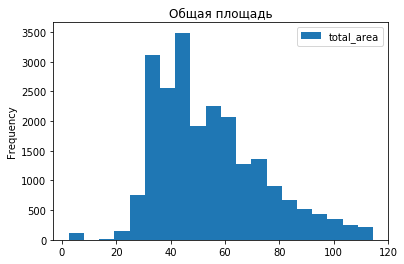

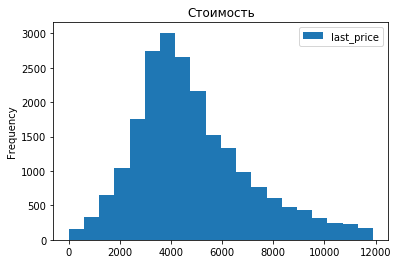

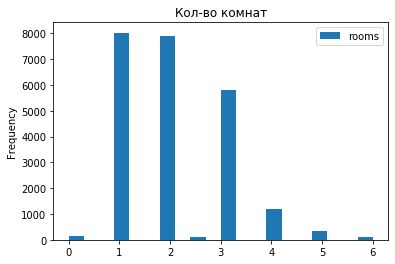

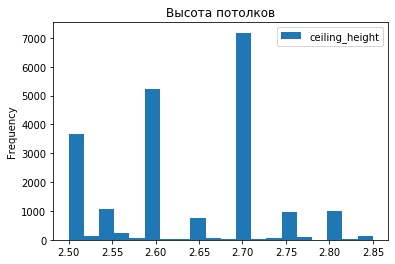

In [36]:
# Список столбцов, для которых нужно построить гистограммы        
value_list = [['total_area', 'Общая площадь'], 
              ['last_price', 'Стоимость'], 
              ['rooms', 'Кол-во комнат'], 
              ['ceiling_height','Высота потолков']
             ]        
draw_hist(flats, value_list, 20)

- __Площадь (total_area)__
На гистограмме видны 4 пика: 30 - студии и однокомнатные квартиры, 40 - одно и двухкомнатные квартиры, 60 и 70 - двух и трехкомнатные квартиры.  Распределение соответствует действительности. Основная масса квартир имеет площадь от 25 до 100 метров.
- __Цена (last_price)__  
Цена описывается нормальным распределением. Из гистограммы следует, что медиана рынка квартир - это примерно 4 млн. руб. Но если посмотреть на среднюю цену и медиану по last_price, то они существенно отличаются от данных гистограммы. Это говорит о том, что есть выбросы в данных: на значениях около нуля и максимальное значение сильно больше 75% перцентили. Для дальнейшего анализа эти выборосы нужно будет исключить.
- __Кол-во комнат (rooms)__  
Одно, двух, трехкомнатные квартиры - наиболее часто встречаются на рынке. Распределение соответствует действительности.
- __Высота потолков (ceiling_height)__  
2.7 м - стандарт для новостроек, соответствует данным гистограммы

#### - Изучите время продажи квартиры. Постройте гистограмму. Посчитайте среднее и медиану. Опишите, сколько обычно занимает продажа. Когда можно считать, что продажи прошли очень быстро, а когда необычно долго?

count    20513.000000
mean       180.266733
std        219.868549
min          1.000000
25%         44.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64 

Время продажи квартир, дней:


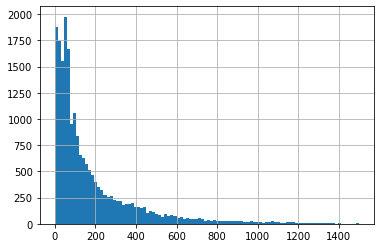

Интервал до 180 дней:


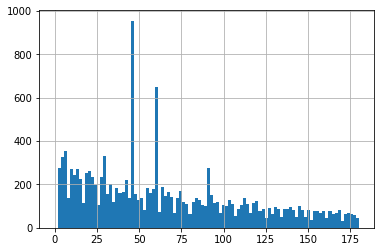

Интервал до 60 дней:


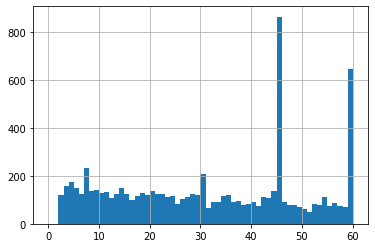

Интервал до 10 дней:


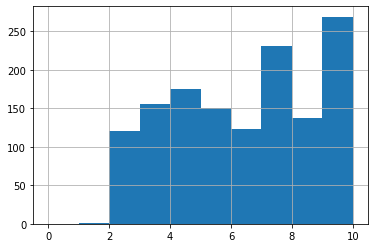

In [37]:
# мы считаем, что если объявление было снято, то квартира продана
print(flats['days_exposition'].describe(), '\n')

print('Время продажи квартир, дней:')
flats['days_exposition'].hist(bins=100, range=(0, 1500))
plt.show()

print('Интервал до 180 дней:')
flats['days_exposition'].hist(bins=100, range=(0, 180))
plt.show()

print('Интервал до 60 дней:')
flats['days_exposition'].hist(bins=60, range=(0, 60))
plt.show()

print('Интервал до 10 дней:')
flats['days_exposition'].hist(bins=10, range=(0, 10))
plt.show()

- Среднее и Медиана сильно искажены выбросами и не отражают актуальное состояние
- Из гистограммы следует, что __50-60 дней является средним временем продажи квартиры__
- На значениях около нуля есть выброс, его нельзя считать достоверным, квартиры не продаются за 1-2 дня. Но __15-30 дней можно считать "быстрой" продажей квартиры__
- Основная масса продаж проходит за 200 дней. После 500 дней сделок очень мало. Это соответствует действительности. __Продажа шла очень долго если она заняла 200 и более дней__

#### - Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

Диаграмма размаха days_exposition:


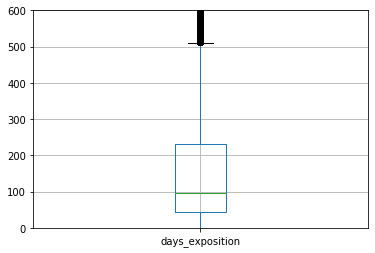

In [38]:
# Определим редкие и выбивающиеся значения для days_exposition
print('Диаграмма размаха days_exposition:')
plt.ylim(0, 600)
flats.boxplot('days_exposition')

Статистика days_exposition после удаления редких значений:
Среднее время продажи, дней: 127.32051488334675
Медиана времени продажи, дней: 85.0
Время продажи квартир, дней:


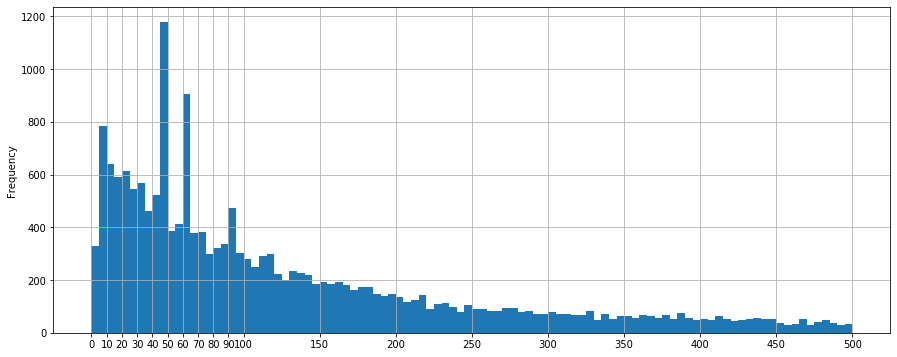

In [39]:
# Минимальное значение выберем days_exposition = 3, 
# т.к. при значениях 3 и больше дней размещения объявления продается более 100 квартир 

# Максимальное значение выберем days_exposition = 500 - граница правого уса диаграммы размаха
data_cleaned = flats.query('days_exposition >= 3 and days_exposition <= 500')

print('Статистика days_exposition после удаления редких значений:')
print('Среднее время продажи, дней:', 
         data_cleaned['days_exposition'].mean()
     )

print('Медиана времени продажи, дней:', 
         data_cleaned['days_exposition'].median()
     )

print('Время продажи квартир, дней:')
data_cleaned['days_exposition'].plot(
        kind='hist', 
        bins=100, 
        range=(0, 500), 
        figsize=(15,6), 
        grid=True, 
        xticks=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400, 450, 500]
    )
plt.show()

- После удаления редких значений среднее время продажи квартиры составляет 127 дней (было 180), медианное 85 дней (было 90)
- На гистограмме видно 4 всплеска значений:  
на 5-10 день основной объем "быстрых" продаж, после чего объемы продаж падают. Это логично, самые "интересные" квартиры (возможно, по цене ниже рынка) продаются быстро, а то что осталось продается медленно
на 45-50 день максимальный объем продаж. В этот период продается основная часть квартир.
после 50 дня продажи равномерно падают - это квартиры по цене выше рынка или низколиквидные объекты. Но на 60-65 день есть сильный всплеск продаж - можно предположить, что после 2-х месяцев ожидания владельцы снижают стоимость квартир в объявлении, что приводит к их продаже. Аналогичный всплеск есть на 90-95 день - снижение цены после 3-х месяцев.

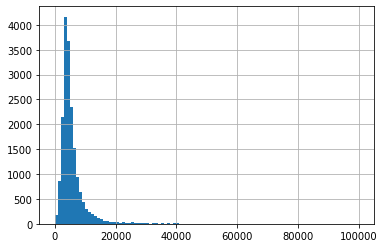

In [40]:
# Определим редкие и выбивающиеся значения для last_price

# посмотрим еще раз на гистограмму цены
data_cleaned['last_price'].hist(bins=100, range=(0, 100000))
plt.show()

Диаграмма размаха last_price:


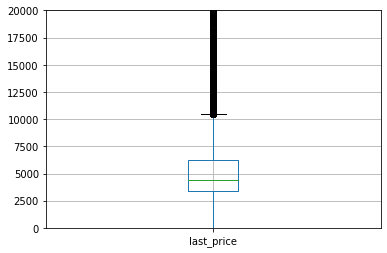

In [41]:
# Цены больше 20 млн. руб встречаются крайне редко
data_cleaned = data_cleaned.query('last_price < 20000')

# Используем диаграмму размаха для определения верхней границы для last_price
print('Диаграмма размаха last_price:')

plt.ylim(0, 20000)
data_cleaned.boxplot('last_price')

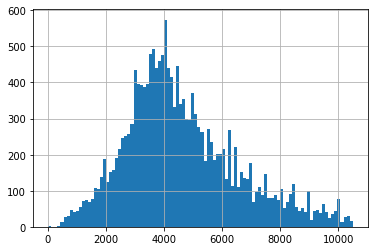

In [42]:
# Убираем из dataset все выбивающиеся значения last_price
data_cleaned = data_cleaned.query('last_price < 10500')

data_cleaned['last_price'].hist(bins=100)

- Основная масса квартир на рынке продается в диапазоне 2-6 млн. руб. 
- Выбивающиеся значения, среди которых есть сверхдорогие квартиры и некорректные данные, удалены из выборки, чтобы они не искажали картину. В выборке остались только типовые данные для этого рынка.

Диапазон допустимых значений для кол-ва комнат 
 Мин: 0.0 Max: 3.5


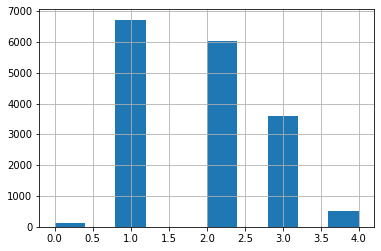

In [43]:
# Определим редкие и выбивающиеся значения для rooms
# Минимальное кол-во комнат = 0 (студии)
# считаем длину правого "уса" диаграммы размаха для определения выбросов
range_min, range_max = define_range(data_cleaned['rooms'])
print('Диапазон допустимых значений для кол-ва комнат', 
      '\n',
      'Мин:',
      range_min,
      'Max:',
      range_max
     )

# удаляем выбросы в столбце rooms
data_cleaned = data_cleaned.query('rooms <= ceil(@range_max)')

data_cleaned['rooms'].hist(bins=10)

- Минимальное кол-во комнат - 0, это студии
- Максимальное кол-во комнат - 4

Наибольшее кол-во квартир в объявлениях - одно и двухкомнатные.

Диапазон допустимых значений Общей площади 
 Мин: 12.0 Max: 96.35


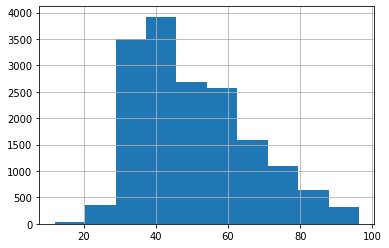

In [44]:
# Удалим выбросы для столбца total_area

range_min, range_max = define_range(data_cleaned['total_area'])
print('Диапазон допустимых значений Общей площади', 
      '\n',
      'Мин:',
      range_min,
      'Max:',
      range_max
     )

# удаляем выбросы в столбце total_area
data_cleaned = data_cleaned.query('total_area <= @range_max')

data_cleaned['total_area'].hist(bins=10)

- Типовая квартира из объявления имеет площадь: 30-40 м. Это совпадает с предыдущим выводом - большенство квартир одно или двухкомнатные.

#### - Какие факторы больше всего влияют на стоимость квартиры? Изучите, зависит ли цена от квадратного метра, числа комнат, удалённости от центра. Изучите зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучите зависимость от даты размещения: дня недели, месяца и года.

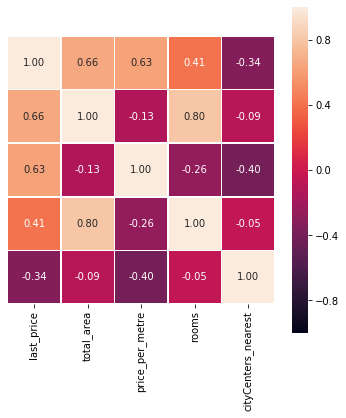

In [45]:
# Матрица корреляции параметров квартир и Цены
# создадим отдельный датасет со столбцами для расчета корреляции

flats_params_corr = data_cleaned.loc[:, ['last_price', 
                                         'total_area', 
                                         'price_per_metre', 
                                         'rooms', 
                                         'cityCenters_nearest'
                                        ]
                                    ]

plt.subplots(figsize=(6,6))
sns.heatmap(flats_params_corr.corr(), 
            annot=True, 
            fmt=".2f", 
            linewidths=.5, 
            vmin=-1, 
            vmax=1,
            square=True,
            yticklabels=False
           )

# Если оставить подписи по двум осям, то диаграмма обрезается. Не понял, как это исправить.

- Общая стоимость квартиры коррелируется с общей площадью и стоимость кв. метра. С остальными параметрами взаимосвязь слабая.
- Наибольшая корреляция у параметров Общая площадь и Кол-во комнат

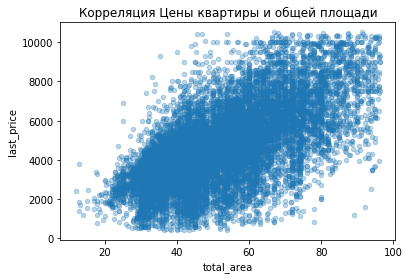

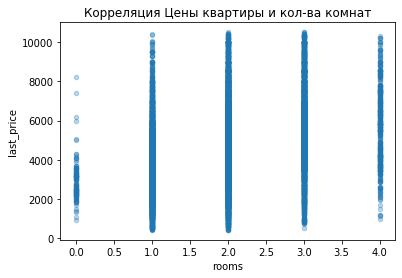

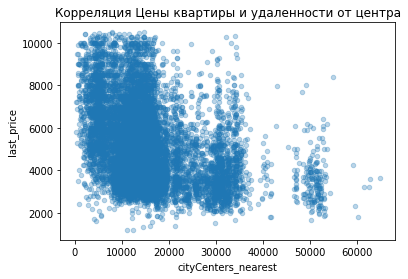

In [46]:
# Диаграммы рассеивания
data_cleaned.plot(x='total_area', 
                  y='last_price', 
                  kind='scatter', 
                  alpha=0.3, 
                  title='Корреляция Цены квартиры и общей площади'
                 )

data_cleaned.plot(x='rooms', 
                  y='last_price', 
                  kind='scatter', 
                  alpha=0.3, 
                  title='Корреляция Цены квартиры и кол-ва комнат'
                 )

data_cleaned.plot(x='cityCenters_nearest', 
                  y='last_price', 
                  kind='scatter', 
                  alpha=0.3, 
                  title='Корреляция Цены квартиры и удаленности от центра'
                 )

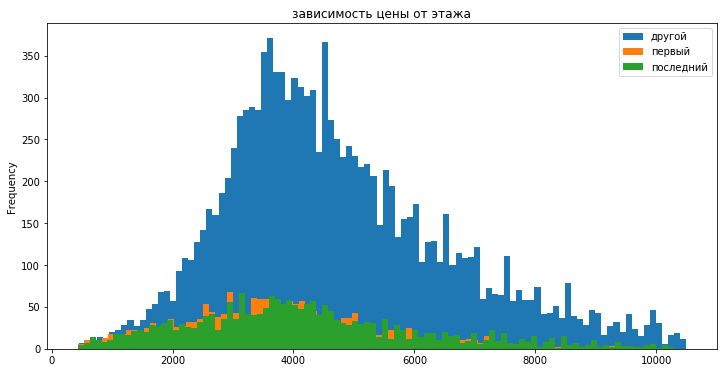

In [47]:
# зависимость цены от этажа
# все три гистограммы совместим на одном графике
ax = plt.subplot(1,1,1)
for name, group_data in data_cleaned.groupby('floor_type'):
    ax = group_data.plot(y='last_price', 
                         kind='hist', 
                         bins=100, 
                         title='зависимость цены от этажа', 
                         ax=ax, 
                         label=name,
                         figsize=(12,6)
                        )    

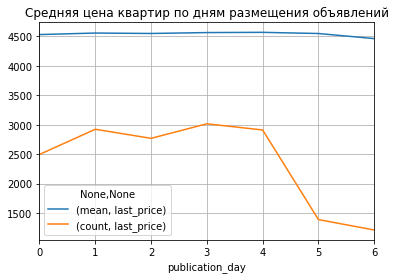

In [48]:
# Для оценки влияния дня размещения объявления посчитаем среднюю стоимость квартир для каждого дня недели.
(data_cleaned
     .pivot_table(index='publication_day', values='last_price', aggfunc=['mean','count'])
     .plot( 
           grid=True, 
           title='Средняя цена квартир по дням размещения объявлений'
          )
)

На графике видно, что в воскресенье цена квартир в публикуемых объявлениях ниже, но разница меньше 100 тыс.руб по сравнению с другими днями.
Я не думаю, что есть какая-то связь между конечной ценой, по которой была продана квартира, и днем размещения объявления. Хотя бы потому, что мы смотрим на конечную цену (продажи), а не на цену размещения в первоначальном объявление. Цена могла поменяться несколько раз и в разные дни недели.

Зависимость кол-ва опубликованных объявлений от дня недели точно есть - в выходные публикуется в 2 раза меньше объявлений.

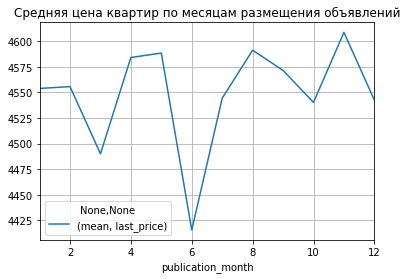

In [49]:
# Для оценки влияния месяца размещения объявления посчитаем среднюю стоимость квартир для каждого месяца.
(data_cleaned
     .pivot_table(index='publication_month', values='last_price', aggfunc=['mean'])
     .plot( 
           grid=True, 
           title='Средняя цена квартир по месяцам размещения объявлений'
          )
)

Минимальные цены наблюдаются в марте и июне, но снижение цены всего около 100 тыс. руб. При средней цене в 4.5 млн. руб. такое снижение не является существенным.

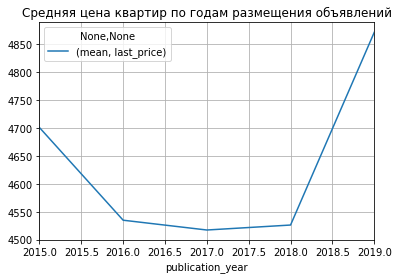

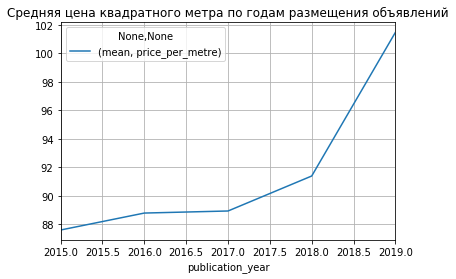

In [50]:
# Для оценки влияния года размещения объявления посчитаем среднюю стоимость квартир для каждого года.
(data_cleaned
     .pivot_table(index='publication_year', values='last_price', aggfunc=['mean'])
     .plot( 
           grid=True, 
           title='Средняя цена квартир по годам размещения объявлений'
          )
)

# динамика изменения цены квадратного метра
(data_cleaned
     .pivot_table(index='publication_year', values='price_per_metre', aggfunc=['mean'])
     .plot( 
           grid=True, 
           title='Средняя цена квадратного метра по годам размещения объявлений'
          )
)

Цена квартир зависит от года размещения объявлений, точнее, зависит от состояния рынка недвижимости в конкретный год. В 2016 - 2018 г. был спад рынка и снижение цен. В 2018 - 2019 рост цен.
Квадратный метр жилой недвижимости дорожает с каждым годом.

__Вывод__  
- Для оценки взаимосвязи параметров был посчитан коэффициент корреляции Пирсона. Из полученных значений следует, что корреляция между параметрами слабая (например: для Цены и Общей площади квартиры) или вообще отсутствует, в случае Цены и Удаленности от центра.  
По диаграммам рассеяния видно, что взаимосвязь есть, но она не линейная, поэтому коэф. Пирсона ее не учитывает. Логически это верно, т.к. Цену квартиры определяет совокупность факторов.  
Например: для параметров "Цена - Кол-во комнат" диаграмма показывает, что однокомнатная квартира может стоить столько же как трехкомнатная квартира. Это верно, т.к. "однушка" в центре может стоить больше "трешки" в области.  
Аналогично для параметров "Цена - Удаленности от центра". В центре и не в центре города встречаются разные квартиры разных ценовых категорий, по мере удаления от центра цена квартир снижается, но взаимосвязь не линейная.
- Зависимость Цены от Этажа. Распределение по цене примерно похоже, есть смещение в сторону более недорогих квартир.
Можно уверенно сказать, что на первых и последних этажах квартир меньше чем на других этажах. И этих квартиры немного дешевле аналогичных квартир на других этажах.
- Зависимость Цены от Даты размещения.  
Распределение цены по дням недели примерно одинаковое для всех дней. День размещения объявления на стоимость не влияет, но активность размещения объявлений в разные дни разная. В выходные объявлений публикуется меньше.  
Месяц размещения объявления также практически не влияет на Цену. Минимальные цены наблюдаются в марте и июне, но снижение цены всего около 100 тыс. руб. При средней цене в 4.5 млн. руб. такое снижение не является существенным.  
Динамика изменения цены по годам показывает состояние рынка недвижимости в конкретный год. На этом графике видны тренды. В 2016 - 2018 г. был спад рынка и снижение цен. В 2018 - 2019 рост цен.  
Квадратный метр жилой недвижимости дорожает с каждым годом.

#### Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья.

In [51]:
top_10_locality = (data_cleaned
                       .groupby('locality_name')['last_price']
                       .agg(['count', 'mean'])
                       .sort_values(by='count', ascending=False)
                  )

top_10_locality['mean'] = top_10_locality['mean'].astype('int64')

print('10 населённых пунктов с наибольшим числом объявлений:',
      '\n',
      top_10_locality.head(10),
      '\n'
     )

max_price = top_10_locality.head(10)['mean'].max()
min_price = top_10_locality.head(10)['mean'].min()

print('Самая высокая средняя стоимость жилья:',
      '\n',
      top_10_locality.query('mean == @max_price'),
     '\n'
     )

print('Самая низкая средняя стоимость жилья:',
      '\n',
      top_10_locality.query('mean == @min_price'),
     '\n'
     )

10 населённых пунктов с наибольшим числом объявлений: 
                    count  mean
locality_name                 
Санкт-Петербург    10583  5255
Мурино               508  3617
Кудрово              388  4318
поселок Шушары       377  3964
Всеволожск           301  3553
Колпино              287  3725
поселок Парголово    279  4376
Пушкин               250  5062
Гатчина              238  3280
Выборг               184  2951 

Самая высокая средняя стоимость жилья: 
                  count  mean
locality_name               
Санкт-Петербург  10583  5255 

Самая низкая средняя стоимость жилья: 
                count  mean
locality_name             
Выборг           184  2951 



#### Изучите предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделите квартиры в Санкт-Петербурге ('locality_name'). Ваша задача — выяснить, какая область входит в центр. Создайте столбец с расстоянием до центра в километрах: округлите до целых значений. После этого посчитайте среднюю цену для каждого километра. Постройте график: он должен показывать, как цена зависит от удалённости от центра. Определите границу, где график сильно меняется — это и будет центральная зона.

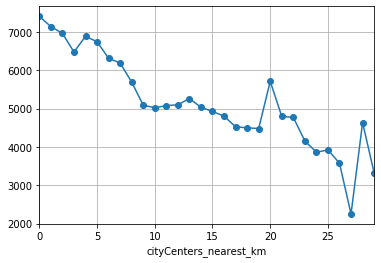

In [52]:
# выборка квартир для Санкт-Петербурга
spb_center = data_cleaned.query('locality_name == "Санкт-Петербург"')

spb_center = spb_center.dropna(subset=['cityCenters_nearest'])
spb_center['cityCenters_nearest_km'] = spb_center['cityCenters_nearest'] / 1000
spb_center['cityCenters_nearest_km'] = spb_center['cityCenters_nearest_km'].astype('int64')

spb_center.groupby('cityCenters_nearest_km')['last_price'].agg('mean').plot(style='o-', grid=True)

Центральная зона для Санкт-Петербурга составляет 9 km

#### Выделите сегмент квартир в центре. Проанализируйте эту территорию и изучите следующие параметры: площадь, цена, число комнат, высота потолков.

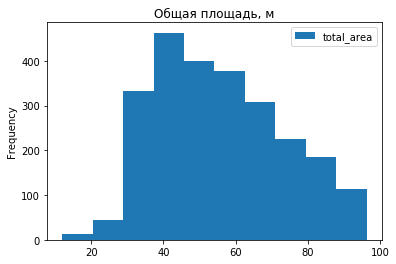

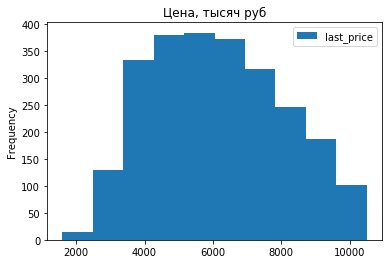

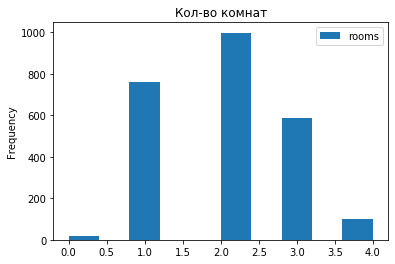

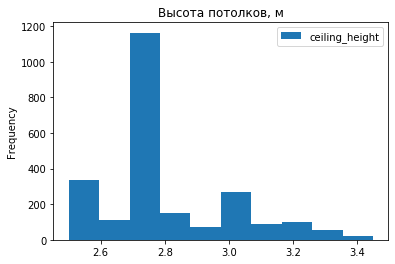

In [53]:
# Создаем набор данных для центральной зоны СПБ
spb_center = spb_center.query('cityCenters_nearest_km <= 9')

value_list = [['total_area', 'Общая площадь, м'], 
              ['last_price', 'Цена, тысяч руб'], 
              ['rooms', 'Кол-во комнат'], 
              ['ceiling_height','Высота потолков, м']
             ]

draw_hist(spb_center, value_list, 10)

#### Также выделите факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления). Сделайте выводы. Отличаются ли они от общих выводов по всему городу?

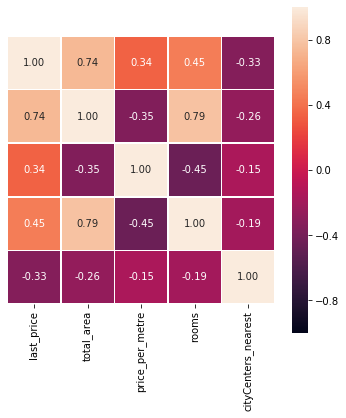

In [54]:
# Матрица корреляции
# создадим отдельный датасет со столбцами для расчета корреляции

center_params_corr = spb_center.loc[:, ['last_price', 
                                         'total_area', 
                                         'price_per_metre', 
                                         'rooms', 
                                         'cityCenters_nearest'
                                        ]
                                    ]

plt.subplots(figsize=(6,6))
sns.heatmap(center_params_corr.corr(), 
            annot=True, 
            fmt=".2f", 
            linewidths=.5, 
            vmin=-1, 
            vmax=1,
            square=True,
            yticklabels=False
           )

Для квартир одного центрального района одного города наблюдается более сильная корреляция Цены и Общей площади, Цены и Кол-ва комнат.

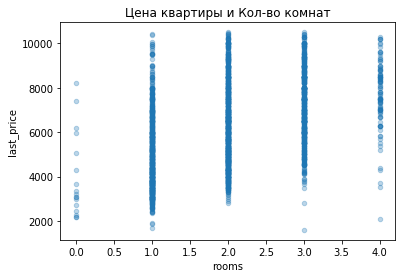

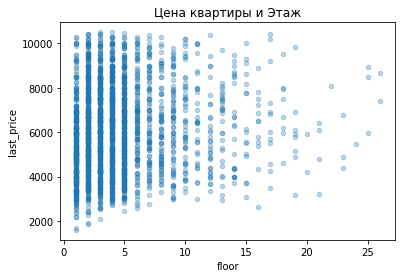

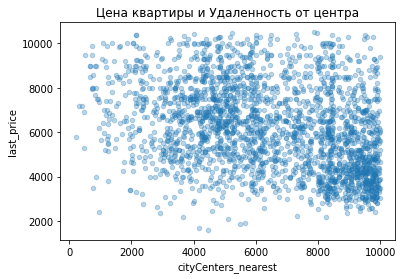

In [55]:
# Оценка влияния параметров на стоимость квартиры
spb_center.plot(
                x='rooms', 
                y='last_price', 
                kind='scatter', 
                alpha=0.3, 
                title='Цена квартиры и Кол-во комнат'
                )

spb_center.plot(x='floor', 
                y='last_price', 
                kind='scatter', 
                alpha=0.3, 
                title='Цена квартиры и Этаж'
               )

spb_center.plot(x='cityCenters_nearest', 
                y='last_price', 
                kind='scatter', 
                alpha=0.3, 
                title='Цена квартиры и Удаленность от центра')

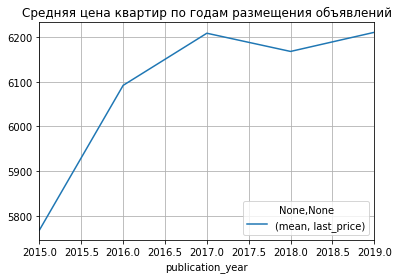

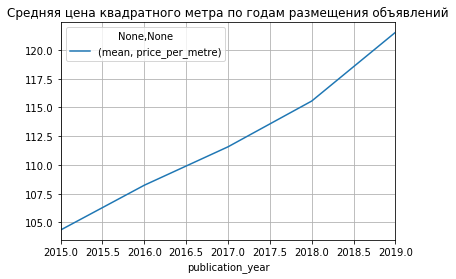

In [56]:
# зависимость от даты размещения: года
# Для оценки влияния года размещения объявления посчитаем среднюю стоимость квартир для каждого года.
(spb_center
     .pivot_table(index='publication_year', values='last_price', aggfunc=['mean'])
     .plot( 
           grid=True, 
           title='Средняя цена квартир по годам размещения объявлений'
          )
)

# динамика изменения цены квадратного метра
(spb_center
     .pivot_table(index='publication_year', values='price_per_metre', aggfunc=['mean'])
     .plot( 
           grid=True, 
           title='Средняя цена квадратного метра по годам размещения объявлений'
          )
)

### Вывод
- Для центральной зоны СПБ характерны следующие параметры квартир:  
общая площадь от 30 до 80 м  
число комнат от 1 до 3  
высота полоков 2.7 - 3 м  
стоимость от 3 до 8 млн. руб.
- В 2019 году значительно сократилось кол-во объявлений по сравнению с предыдущими годами. Возможно, из-за того, что это сегмент более дорогих квартир и спрос в этом сегменте сократился сильнее по сравнению с более дешевым сегментом квартир из области.
- Для квартир центральной зоны СПБ коэф. кореляции цены и других параметров низкий, т.к. взаимосвязь не линейная. Наибольшее значение коэффициента (0.5) для параметров "Цена - кол-во комнат". От этажа стоимость квартиры не зависит и слабо зависит от удаленности от центра.
- Цена квартиры зависит от совокупности параметров, как для всех квартир области так и для центральной части СПБ.

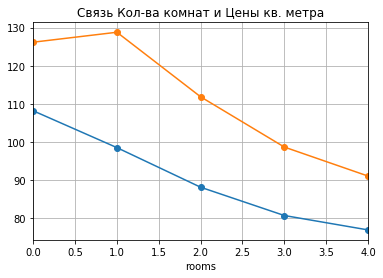

In [57]:
# Сравнение обнаруженных зависимостей для центра СПБ и всех данных
# Кол-во комнат и Цена кв. метра
ax=(data_cleaned
    .groupby('rooms')['price_per_metre']
    .agg('mean')
    .plot(style='o-', 
          grid=True,
          title='Связь Кол-ва комнат и Цены кв. метра'
         )
   )

(spb_center
     .groupby('rooms')['price_per_metre']
     .agg('mean')
     .plot(style='o-', 
           grid=True, 
           ax=ax
          )
)

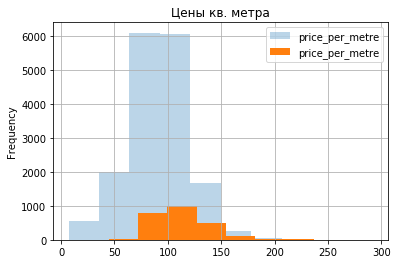

In [58]:
# Цена кв. метра
ax=(data_cleaned
    .plot(kind='hist',
          y='price_per_metre',
          alpha=0.3,
          grid=True,
          title='Цены кв. метра'
         )
   )

(spb_center
    .plot(kind='hist',
          y='price_per_metre',
          alpha=1,
          grid=True,
          ax=ax
         )
   )

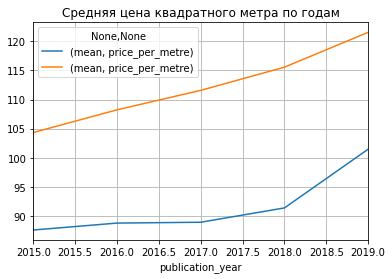

In [59]:
# Связь цены кв. метра и года размещения объявления
ax=(data_cleaned
     .pivot_table(index='publication_year', values='price_per_metre', aggfunc=['mean'])
     .plot( 
           grid=True, 
           title='Средняя цена квадратного метра по годам'
          )
)

(spb_center
     .pivot_table(index='publication_year', values='price_per_metre', aggfunc=['mean'])
     .plot( 
           grid=True, 
           ax=ax
          )
)

### Шаг 5. Общий вывод

__1. Предобработка данных__  
Dataset содержит 23699 записей с объявлениями о продаже квартир в Ленинградской области за период 2015 - 2019 гг.
На этапе предобработки данных часть пропусков были заполнены данными, выполнено преобразование типов столбцов на более соответствующие.
Для столбца locality_name удалены дубликаты названий населенных пунктов.  
__Рекомендация разработчикам: значения locality_name явно выбираются из словаря при заполнении объявления. Нужно привести словарь к единому формату типов населенных пунктов и удалить дубликаты. Например: "посёлок - поселок", "городской поселок - поселок городского типа", "деревня Фёдоровское - городской поселок Фёдоровское"__

__2. Расчет дополнительных параметров__  
В dataset были добавлены значения: цена квадратного метра, день недели, месяц и год публикации объявления, этаж квартиры (варианты — первый, последний, другой), соотношение жилой и общей площади, а также отношение площади кухни к общей.

__3. Исследовательский анализ данных__  
После изучения параметров квартир и анализа диаграмм были выявлены редкие и выбивающиеся значения параметров, которые были исключены из дальнейшего рассмотрения.  
Определены наиболее часто встречающиеся парамеры квартир:
- основная масса квартир имеет площадь от 25 до 100 метров
- цены квартир в диапазоне от 2 до 6 млн. руб, медиана рынка - 4 млн. руб
- одно, двух, трехкомнатные квартиры - наиболее часто встречаются на рынке
- высота потолков - 2.7 м. 
- квартир на первом и последних этажах продается меньше чем на других этажах и стоят они дешевле

__4. Скорость продажи квартир__  
На 5-10 день приходится основной объем "быстрых" продаж, после чего объемы продаж падают. Это логично, самые "интересные" квартиры (возможно, по цене ниже рынка) продаются быстро, а то что осталось продается медленно - на 45-50 день. В этот период продается основная часть квартир. После 50-го дня продажи равномерно падают, видимо, это квартиры по цене выше рынка или низколиквидные объекты. Но на 60-65 день есть всплеск продаж - можно предположить, что после 2-х месяцев ожидания владельцы снижают стоимость квартир в объявлении, что приводит к их продаже. Аналогичный всплеск есть на 90-95 день - снижение цены после 3-х месяцев.

__5. Зависимость Цены квартиры от других параметров (для всех объявлений)__  
Для оценки взаимосвязи параметров был посчитан коэффициент корреляции Пирсона. Из полученных значений следует, что корреляция между параметрами слабая (например: для Цены и Общей площади квартиры) или вообще отсутствует, в случае Цены и Удаленности от центра.  
По диаграммам рассеяния видно, что взаимосвязь есть, но она не линейная, поэтому коэф. Пирсона ее не учитывает. Логически это верно, т.к. Цену квартиры определяет совокупность факторов.  
Например: для параметров "Цена - Кол-во комнат" диаграмма показывает, что однокомнатная квартира может стоить столько же как трехкомнатная квартира. Это верно, т.к. "однушка" в центре может стоить больше "трешки" в области.  
Аналогично для параметров "Цена - Удаленности от центра". В центре и не в центре города встречаются разные квартиры разных ценовых категорий, по мере удаления от центра цена квартир снижается, но взаимосвязь не линейная.  
Зависимость Цены от Этажа: можно уверенно сказать, что на первых и последних этажах квартир меньше чем на других этажах. И этих квартиры немного дешевле аналогичных квартир на других этажах.  
Зависимость Цены от Даты размещения: распределение цены по дням недели примерно одинаковое для всех дней. День размещения объявления на стоимость не влияет, но активность размещения объявлений в разные дни разная. В выходные объявлений публикуется меньше.  
Месяц размещения объявления также не влияет на Цену. Начало (февраль - март) и конец года (октябрь - ноябрь) - наиболее активные месяцы по продажам. В Декабре спад продаж. В 2019 году наблюдается небольшое смещение (относительно 2017, 2018 г.) распределения в сторону более дорогих квартир.

__6. Анализ данных для объявлений по квартирам центральной части Санкт-Петербурга__  
На основе данных по удаленности квартиры от центра города и анализа графика изменения стоимости определена центральная зона города - 9 km от центра.  
Для центральной зоны СПБ характерны следующие параметры квартир:
- общая площадь от 30 до 80 м
- число комнат от 1 до 3
- высота полоков 2.7 - 3 м
- стоимость от 3 до 8 млн. руб.  

Для квартир центральной зоны СПБ коэф. кореляции цены и других параметров низкий, т.к. взаимосвязь нелинейная. Наибольшее значение коэффициента (0.5) для параметров "Цена - кол-во комнат". От этажа стоимость квартиры не зависит и слабо зависит от удаленности от центра.  
Цена квартиры зависит от совокупности параметров, как для всех квартир области так и для центральной части СПБ.  
В 2019 году значительно сократилось кол-во объявлений по сравнению с предыдущими годами. Возможно, из-за того, что это сегмент более дорогих квартир и спрос в этом сегменте сократился сильнее по сравнению с сегментом квартир из области.

__7. Сравнение цены кв. метра для центра СПБ и всех квартир__  
- Зависимость цены кв. метра от кол-ва комнат примерно одинаковая
- Квартиры в центре стоят в среднем дороже, но квартир меньше
- Квартиры в центре дорожают более стабильно